<a href="https://colab.research.google.com/github/cmoestl/heliocats/blob/master/read_helio_catalogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#read-helio-catalogs

This notebook demonstrates how to use the heliospheric event catalogs in menu "data" on  

https://helioforecast.space


Christian Möstl, IWF Graz Austria May 2020

https://twitter.com/chrisoutofspace


https://www.iwf.oeaw.ac.at/user-site/christian-moestl/

install sunpy first, all other packages can be simply imported


In [38]:
!pip install sunpy

In [0]:
import pickle
import pandas as pd
import numpy as np
import astropy
import sunpy
from sunpy.time import parse_time
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,8)

# HI ARRIVAL CATALOG (ARRCAT)


Read CME arrival catalog (ARRCAT) from heliospheric imager observations (HELCATS HIGeoCAT)

https://helioforecast.space/arrcat

The easiest version is to directly paste the url into a pandas function that makes a pandas dataframe from a csv file.

In [0]:
url='https://helioforecast.space/static/sync/arrcat/HELCATS_ARRCAT_v20.csv'
ac=pd.read_csv(url)

In [58]:
ac

,Unnamed: 0,id,sc,target_name,sse_launch_time,target_arrival_time,target_arrival_time_err,target_distance,target_heeq_lon,target_heeq_lat,target_delta,sse_heeq_lon,sse_heeq_lat,sse_speed,sse_speed_err,target_speed,target_speed_err,pa_fit,pa_n,pa_s,pa_center
0,0,HCME_A__20180828_01,A,PSP,2018-08-28T14:13Z,2018-09-01T20:00Z,21.8,0.969,-7.92,5.86,-5.9,-2,0,400,82,396,81,270,255,280,267.5
1,1,HCME_A__20180919_01,A,PSP,2018-09-19T00:21Z,2018-09-21T11:16Z,2.4,0.846,-13.51,4.83,-13.5,0,4,633,26,597,25,275,260,290,275.0
2,2,HCME_A__20181026_01,A,PSP,2018-10-26T04:32Z,2018-10-27T22:51Z,2.1,0.330,10.47,1.33,26.5,-16,-19,433,21,324,16,250,210,260,235.0
3,3,HCME_A__20190402_01,A,PSP,2019-04-02T02:56Z,2019-04-02T22:39Z,0.1,0.180,-81.93,-2.98,-12.9,-69,4,400,3,379,3,285,270,290,280.0
4,4,HCME_A__20190513_01,A,PSP,2019-05-13T16:22Z,2019-05-15T17:35Z,9.1,0.796,69.65,3.54,19.6,50,0,768,137,672,120,260,235,280,257.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1543,HCME_A__20180828_01,A,Mars,2018-08-28T14:13Z,2018-09-03T19:19Z,31.9,1.383,-12.89,5.08,-10.9,-2,0,400,82,385,79,270,255,280,267.5
1544,1544,HCME_A__20180919_01,A,Mars,2018-09-19T00:21Z,2018-09-23T08:01Z,4.3,1.382,-19.62,5.50,-19.6,0,4,633,26,554,23,275,260,290,275.0
1545,1545,HCME_A__20181026_01,A,Mars,2018-10-26T04:32Z,2018-11-01T09:25Z,7.2,1.396,-33.68,5.55,-17.7,-16,-19,433,21,390,19,250,210,260,235.0
1546,1546,HCME_A__20181211_01,A,Mars,2018-12-11T02:44Z,2018-12-17T09:33Z,0.4,1.437,-51.94,4.40,7.1,-59,8,402,1,396,1,275,260,280,270.0


In [59]:
print('get keys of ac dataframe')
ac.keys()


print('time as numpy array')
ac_time_num=parse_time(ac.sse_launch_time).plot_date
print(ac_time_num)
print()

print('target distance as numpy array')
ac_target_distance=np.array(ac.target_distance)
print(ac_target_distance)


get keys of ac dataframe
time as numpy array
[736934.59236111 736956.01458333 736993.18888889 ... 736993.18888889
 737039.11388889 737085.04861111]

target distance as numpy array
[0.969 0.846 0.33  ... 1.396 1.437 1.493]


Make 2 plots


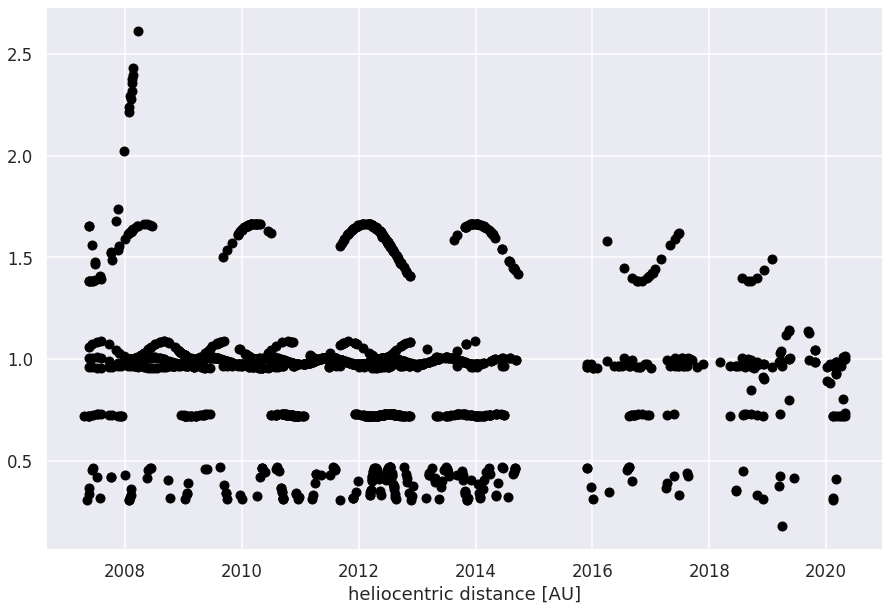

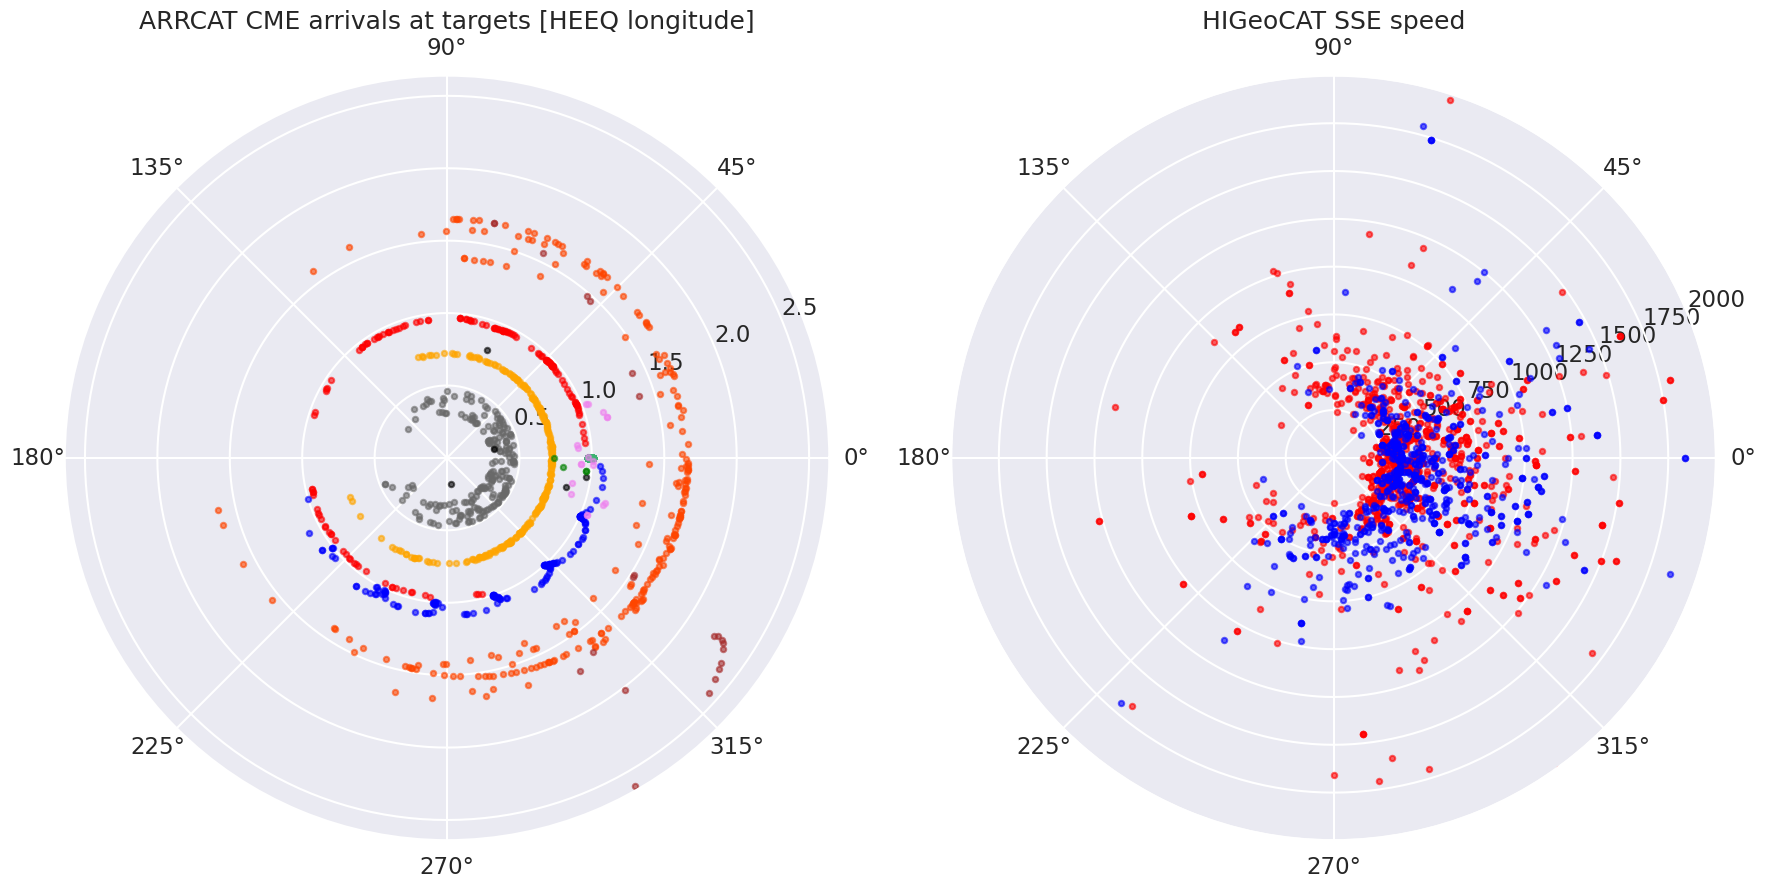

In [60]:

sns.set_context("talk")     
sns.set_style('darkgrid')
fig=plt.figure(1,figsize=(15,10))
plt.plot_date(ac_time_num,ac_target_distance,'ok')
plt.xlabel('heliocentric distance [AU]')



fig=plt.figure(2, figsize=(18,10), dpi=100) 
ax = plt.subplot(121,projection='polar') 

plt.title('ARRCAT CME arrivals at targets [HEEQ longitude]')

#get indices for each target
merci=np.where(ac.target_name=='Mercury')[0]
venusi=np.where(ac.target_name=='Venus')[0]
earthi=np.where(ac.target_name=='Earth_L1')[0]
marsi=np.where(ac.target_name=='Mars')[0]

stai=np.where(ac.target_name=='STEREO-A')[0]
stbi=np.where(ac.target_name=='STEREO-B')[0]
pspi=np.where(ac.target_name=='PSP')[0]
soloi=np.where(ac.target_name=='SolarOrbiter')[0]
bepii=np.where(ac.target_name=='BepiColombo')[0]
ulyi=np.where(ac.target_name=='Ulysses')[0]

#markersize
ms=15
#alpha
al=0.6

ax.scatter(np.radians(ac.target_heeq_lon[merci]),ac.target_distance[merci],s=ms,c='dimgrey', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[venusi]),ac.target_distance[venusi],s=ms,c='orange', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[earthi]),ac.target_distance[earthi],s=ms,c='mediumseagreen', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[marsi]),ac.target_distance[marsi],s=ms,c='orangered', alpha=al)

ax.scatter(np.radians(ac.target_heeq_lon[stai]),ac.target_distance[stai],s=ms,c='red', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[stbi]),ac.target_distance[stbi],s=ms,c='blue', alpha=al)

ax.scatter(np.radians(ac.target_heeq_lon[pspi]),ac.target_distance[pspi],s=ms,c='black', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[soloi]),ac.target_distance[soloi],s=ms,c='green', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[bepii]),ac.target_distance[bepii],s=ms,c='violet', alpha=al)
ax.scatter(np.radians(ac.target_heeq_lon[ulyi]),ac.target_distance[ulyi],s=ms,c='brown', alpha=al)

plt.ylim([0,np.max(ac.target_distance)+0.03])



ax = plt.subplot(122,projection='polar')
plt.title('HIGeoCAT SSE speed')
hiai=np.where(ac.sc=='A')[0]
hibi=np.where(ac.sc=='B')[0]

ax.scatter(np.radians(ac.sse_heeq_lon[hiai].astype(float)),ac.sse_speed[hiai],s=ms,c='red', alpha=al)
ax.scatter(np.radians(ac.sse_heeq_lon[hibi].astype(float)),ac.sse_speed[hibi],s=ms,c='blue', alpha=al)

plt.ylim([0,2000])

plt.tight_layout()



# ICMECAT


Read ICMECAT